In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/config3/config.yaml
/kaggle/input/input-data/labels/005268.txt
/kaggle/input/input-data/labels/001921.txt
/kaggle/input/input-data/labels/001487.txt
/kaggle/input/input-data/labels/001854.txt
/kaggle/input/input-data/labels/001338.txt
/kaggle/input/input-data/labels/gettyimages-650169013-612x612_jpg.rf.90fc5c76e7c05968c9b793beb168af66.txt
/kaggle/input/input-data/labels/001186.txt
/kaggle/input/input-data/labels/image_154_jpg.rf.8b5af37534dcf73cb9cd2833f7630273.txt
/kaggle/input/input-data/labels/001196.txt
/kaggle/input/input-data/labels/001142.txt
/kaggle/input/input-data/labels/001757.txt
/kaggle/input/input-data/labels/001321.txt
/kaggle/input/input-data/labels/005225.txt
/kaggle/input/input-data/labels/001177.txt
/kaggle/input/input-data/labels/006336_jpg.rf.4882fa277106be1378a906016ab8a711.txt
/kaggle/input/input-data/labels/001225.txt
/kaggle/input/input-data/labels/Video2_91_jpg.rf.faca99c76175b53a646f60aa1abc4b14.txt
/kaggle/input/input-data/labels/001184.txt
/ka

In [4]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 734.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 6.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ultralytics import YOLO

In [6]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

In [7]:
classes=['person','hard-hat',
'gloves',
'mask',
'glasses',
'boots',
'vest',
'ppe-suit',
'ear-protector',
'safety-harness']

In [8]:
font = cv2.FONT_HERSHEY_SIMPLEX 
  
# fontScale 
fontScale = 1
   
# Blue color in BGR 
color = (255, 165, 0) 
  
# Line thickness of 2 px 
thickness = 2

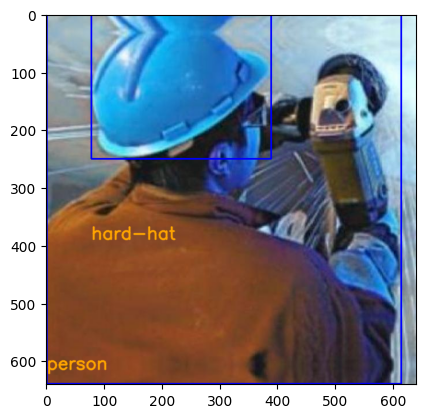

In [9]:
sample_img=cv2.imread('/kaggle/input/input-data/images/-1477-_png_jpg.rf.bac8d06edca64da17ced23797d0e2339.jpg')
f1=open("/kaggle/input/input-data/labels/-1477-_png_jpg.rf.bac8d06edca64da17ced23797d0e2339.txt")

data=f1.readlines()
f1.close()
dh,dw,depth=sample_img.shape

for dt in data:
    cl,x,y,w,h=map(float,dt.split())
    l=int((x-w/2)*dw)
    r=int((x+w/2)*dw)
    t=int((y-h/2)*dh)
    b=int((y+h/2)*dh)
    if l<0:
        l=0
    if r>dw-1:
        r=dw-1
    if t<0:
        t=0
    if b>dh-1:
        b=dh-1
    cv2.rectangle(sample_img,(l,t),(r,b),(0,0,255),2)
    cv2.putText(sample_img,classes[int(cl)],(l,r), font,  
                   fontScale, color, thickness,cv2.LINE_AA)
plt.imshow(sample_img)
plt.show()

In [10]:
import os
IMAGES_PATH="/kaggle/input/input-data/images"
LABELS_PATH="/kaggle/input/input-data/labels"
os.makedirs("data/images")
os.makedirs("data/labels")
#os.makedirs("train/sample")

In [11]:
t_class='0'
for an_file in Path("/kaggle/input/input-data/labels").glob("*"):
    output_txt = Path('/kaggle/working/data/labels') / Path(an_file).with_suffix(".txt").name
    with open(an_file, 'r') as file:
            annotations = file.readlines()
    with output_txt.open("w") as file:
        for annotation in annotations:
                class_label, *bbox = annotation.strip().split()
                if class_label == t_class:
                    file.write(f"{class_label} {' '.join(map(str, bbox))}\n")

In [12]:
import shutil

def copy_jpg_files(source_dir, destination_dir):
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    for filename in os.listdir(source_dir):
        # Check if the file is a JPG file
        if filename.endswith('.jpg'):
            # Get the full path of the source file
            source_file = os.path.join(source_dir, filename)
            # Construct the destination path
            destination_file = os.path.join(destination_dir, filename)
            # Copy the file to the destination directory
            shutil.copyfile(source_file, destination_file)
            print(f"Copied '{filename}' to '{destination_dir}'")

source_directory = '/kaggle/input/input-data/images'
destination_directory = '/kaggle/working/data/images'

copy_jpg_files(source_directory, destination_directory)


Copied '001229.jpg' to '/kaggle/working/data/images'
Copied '001989.jpg' to '/kaggle/working/data/images'
Copied '001071.jpg' to '/kaggle/working/data/images'
Copied '001222.jpg' to '/kaggle/working/data/images'
Copied '001060.jpg' to '/kaggle/working/data/images'
Copied '005021.jpg' to '/kaggle/working/data/images'
Copied '001143.jpg' to '/kaggle/working/data/images'
Copied '001773.jpg' to '/kaggle/working/data/images'
Copied '001324.jpg' to '/kaggle/working/data/images'
Copied '001545.jpg' to '/kaggle/working/data/images'
Copied '001852.jpg' to '/kaggle/working/data/images'
Copied '001190.jpg' to '/kaggle/working/data/images'
Copied '001353_jpg.rf.c0abf8e966961dd3c902dce35a401240.jpg' to '/kaggle/working/data/images'
Copied '-2180-_png_jpg.rf.9d63bb305e7747d22fe9a196dcc5ce13.jpg' to '/kaggle/working/data/images'
Copied '001054.jpg' to '/kaggle/working/data/images'
Copied 'Video2_178_jpg.rf.589896c6e0322de89e52bcd29313c422.jpg' to '/kaggle/working/data/images'
Copied '001781.jpg' to '

In [13]:
model=YOLO("yolov8m.pt")
model.train(data="/kaggle/input/config3/config.yaml",epochs=30)

100%|██████████| 49.7M/49.7M [00:00<00:00, 243MB/s]


Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/config3/config.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-05-08 10:20:25,860	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-08 10:20:26,592	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-08 10:20:28.802645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 10:20:28.802739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 10:20:28.920478: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 74.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels... 416 images, 7 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 1268.77it/s]

train: New cache created: /kaggle/working/data/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels.cache... 416 images, 7 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.39G     0.9335      1.482      1.239        109        640: 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        416       1284      0.598      0.759      0.686      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.39G      1.166      1.206        1.4         63        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.73it/s]

                   all        416       1284     0.0495      0.263      0.031     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.38G      1.337      1.333      1.516        139        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]

                   all        416       1284     0.0554      0.422     0.0326    0.00974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.29G      1.391      1.374      1.558        129        640: 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.80it/s]

                   all        416       1284      0.084       0.17      0.035     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.27G      1.368      1.367      1.533        101        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]

                   all        416       1284       0.11      0.252     0.0788     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.38G      1.314      1.251      1.506        114        640: 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]

                   all        416       1284      0.356      0.608      0.504      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.29G       1.24      1.198      1.438         96        640: 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]

                   all        416       1284      0.615      0.649      0.645      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.39G      1.257      1.241      1.471         82        640: 100%|██████████| 26/26 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]

                   all        416       1284      0.587      0.606       0.58      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.31G       1.23      1.185      1.442        107        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]

                   all        416       1284      0.699       0.67      0.717      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.36G      1.154      1.165      1.399        103        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.72it/s]

                   all        416       1284      0.746      0.699      0.753      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.27G      1.126      1.101      1.379         94        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.68it/s]

                   all        416       1284      0.793      0.734      0.828      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.39G      1.128      1.083      1.403         90        640: 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.69it/s]

                   all        416       1284      0.817      0.783      0.857      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.28G      1.093      1.057      1.369        113        640: 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.72it/s]

                   all        416       1284      0.836      0.781      0.868      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.42G       1.06     0.9836      1.331         83        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]

                   all        416       1284       0.87      0.812        0.9      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.28G      1.016     0.9491      1.305         81        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]

                   all        416       1284      0.822      0.821      0.885      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.37G      1.008      0.965      1.318        120        640: 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]

                   all        416       1284      0.885      0.815       0.91      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.28G     0.9841     0.9367      1.303         97        640: 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]

                   all        416       1284      0.883      0.852      0.928      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.36G     0.9503     0.8779      1.288         70        640: 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]

                   all        416       1284       0.87      0.836      0.914      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.25G     0.9555     0.8781      1.277         88        640: 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]

                   all        416       1284      0.881      0.875      0.932      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.38G     0.9213      0.837      1.237        104        640: 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]

                   all        416       1284      0.884      0.885      0.944      0.738


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.24G     0.8517     0.9206      1.202         51        640: 100%|██████████| 26/26 [00:13<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.72it/s]

                   all        416       1284      0.897      0.865      0.934      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.33G     0.8496     0.7427      1.202         50        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.68it/s]

                   all        416       1284      0.912      0.875      0.949       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.28G     0.7911     0.7206      1.174         58        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]

                   all        416       1284      0.932      0.884      0.956      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.39G     0.7555     0.6755      1.136         53        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.73it/s]

                   all        416       1284      0.897        0.9      0.951      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.24G     0.7397     0.6487      1.126         62        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]

                   all        416       1284      0.916      0.922      0.964      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.36G     0.7127     0.6066      1.118         44        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]

                   all        416       1284      0.931      0.908      0.964      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.24G     0.6824      0.595      1.093         39        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.69it/s]

                   all        416       1284      0.934      0.921      0.971      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.35G     0.6789     0.5756      1.087         45        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.69it/s]

                   all        416       1284      0.933      0.928      0.969      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.29G     0.6631     0.5662      1.076         40        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.69it/s]

                   all        416       1284       0.95      0.932      0.974      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.36G     0.6196     0.5249      1.045         39        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.64it/s]

                   all        416       1284      0.958      0.937      0.978      0.862



30 epochs completed in 0.163 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.64it/s]


                   all        416       1284      0.957      0.937      0.978      0.862
Speed: 0.1ms preprocess, 7.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▅▇██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▅▇██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▅▇██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▆▁▁▁▁▄▆▅▆▆▇▇▇▇▇███████████████
metrics/mAP50-95(B),▄▁▁▁▁▃▄▃▄▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇██████
metrics/precision(B),▅▁▁▁▁▃▅▅▆▆▇▇▇▇▇▇▇▇▇▇██████████
metrics/recall(B),▆▂▃▁▂▅▅▅▆▆▆▇▇▇▇▇▇▇▇█▇▇████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▄▆███▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▂▂▂▂▂▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e8910ff9a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
!zip -r file.zip /kaggle/working/runs/detect/train

  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/val_batch1_labels.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/train/val_batch1_pred.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/train/train_batch1.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train/results.csv (deflated 84%)
  adding: kaggle/working/runs/detect/train/val_batch2_pred.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/train/PR_curve.png (deflated 25%)
  adding: kaggle/working/runs/detect/train/labels_correlogram.jpg (deflated 39%)
  adding: kaggle/working/runs/detect/train/P_curve.png (deflated 19%)
  adding: kaggle/working/runs/detect/train/train_batch520.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/train/confusion_matrix.png (deflated 38%)
  adding: kaggle/working/runs/detect/train/F1_curve.png (deflated 16%)
  adding: kaggle/working/runs/detect/train/labels.jpg (deflated 29%)
  adding: kaggle/working/runs/detect/train/val_ba

In [15]:
!ls

data  file.zip	runs  wandb  yolov8m.pt  yolov8n.pt


In [17]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

In [18]:
model_weight=YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

In [25]:
from PIL import Image
img=cv2.imread("/kaggle/input/sample-test/test2.jpg")
predict=model_weight.predict(img)[0]
print(predict)


0: 352x640 1 Person, 95.0ms
Speed: 3.3ms preprocess, 95.0ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Person'}
obb: None
orig_img: array([[[168, 163, 162],
        [169, 164, 163],
        [169, 164, 163],
        ...,
        [159, 163, 164],
        [163, 167, 168],
        [168, 172, 173]],

       [[166, 161, 160],
        [167, 162, 161],
        [167, 162, 161],
        ...,
        [159, 163, 164],
        [157, 161, 162],
        [158, 162, 163]],

       [[165, 160, 159],
        [166, 161, 160],
        [166, 161, 160],
        ...,
        [158, 162, 163],
        [156, 160, 161],
        [157, 161, 162]],

       ...,

       [[149, 156, 151],
        [150, 157, 152],
        [148, 154, 149],
        ...,
        [141, 158, 167],
        [140, 157, 166],
        [140, 157, 166]],

       [[146, 153, 148],


In [26]:
predict=predict.plot(line_width=1)
predict=predict[:,:,::-1]
predict=Image.fromarray(predict)
predict.save("output_img.jpeg")